
# 📈 Análisis de Ventas – Vinatería La Rosita



## 📌 1 Introducción

Este proyecto tiene como objetivo analizar el comportamiento de las ventas en la **Vinatería** desde enero de 2018 hasta julio de 2021. Se utiliza un conjunto de datos ficticio, que contiene más de 1,700 productos diferentes.



## 🎯 2 Objetivo

- Entender el patrón de ventas mensual.
- Identificar los productos más vendidos.
- Estimar la ganancia bruta considerando un margen del 20%.
- Proveer una base para decisiones más informadas sobre compras, inventario y rentabilidad.


## 4 Importación y Preparación de Datos
Para iniciar con el análisis, se Cargaran los datos históricos de ventas de la vinatería La Rosita, contenidos en un archivo CSV.

La importación se realizará utilizando la librería pandas, permitiendo convertir el archivo CSV en un DataFrame, que facilita la manipulación y el análisis de los datos en un entorno tabular.

Posteriormente, se realizará una inspección inicial para verificar la estructura del dataset, identificar valores nulos, formatos de fechas y tipos de datos inconsistentes. Esto permitirá asegurar que los datos estaran listos para el análisis y la visualización.

Este paso es crucial ya que garantiza la integridad del análisis y permite que los modelos posteriores operen sobre datos limpios, confiables y correctamente estructurados.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar archivo
ruta = '/content/drive/MyDrive/Datos para proyectos/analisis-ventas-la-rosita/Ventas 3 años.csv'
ventas = pd.read_csv(ruta)
ventas.head()


,fecha,codigo_barras,producto,precio_unitario,cantidad_vendida,total_vendido
0,23/05/2019,7501003390288,Aceitunas Sin Gueso Bolsa 175gr Bufalo,3.122,3,9.366
1,20/03/2020,7501003390288,Aceitunas Sin Gueso Bolsa 175gr Bufalo,3.122,2,6.244
2,25/01/2019,7501003390288,Aceitunas Sin Gueso Bolsa 175gr Bufalo,3.122,3,9.366
3,29/10/2019,7501003390288,Aceitunas Sin Gueso Bolsa 175gr Bufalo,3.122,2,6.244
4,31/12/2018,7501003390288,Aceitunas Sin Gueso Bolsa 175gr Bufalo,3.122,2,6.244



## 📦 Dataset

El dataset contiene las siguientes columnas:

- `fecha`: fecha de la venta
- `producto`: nombre del producto vendido
- `cantidad_vendida`: número de unidades vendidas
- `precio_unitario`: precio por unidad
- `total_vendido`: ingreso total por línea




In [4]:
#Analicemos como vienen los datos.
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64260 entries, 0 to 64259
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fecha             64260 non-null  object 
 1   codigo_barras     64260 non-null  object 
 2   producto          64260 non-null  object 
 3   precio_unitario   64260 non-null  float64
 4   cantidad_vendida  64260 non-null  int64  
 5   total_vendido     64260 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.9+ MB


In [5]:
# Ajustes en tipo de fecha
ventas['fecha'] = pd.to_datetime(ventas['fecha'], dayfirst=True)
# Eliminar exactamente el 1 de julio de 2021
ventas = ventas[ventas['fecha'] != '2021-07-01']

In [6]:

ventas['año'] = ventas['fecha'].dt.year
ventas['mes'] = ventas['fecha'].dt.to_period('M')
ventas.head()

<ipython-input-6-7d625c033ab2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas['año'] = ventas['fecha'].dt.year
<ipython-input-6-7d625c033ab2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas['mes'] = ventas['fecha'].dt.to_period('M')


,fecha,codigo_barras,producto,precio_unitario,cantidad_vendida,total_vendido,año,mes
0,2019-05-23,7501003390288,Aceitunas Sin Gueso Bolsa 175gr Bufalo,3.122,3,9.366,2019,2019-05
1,2020-03-20,7501003390288,Aceitunas Sin Gueso Bolsa 175gr Bufalo,3.122,2,6.244,2020,2020-03
2,2019-01-25,7501003390288,Aceitunas Sin Gueso Bolsa 175gr Bufalo,3.122,3,9.366,2019,2019-01
3,2019-10-29,7501003390288,Aceitunas Sin Gueso Bolsa 175gr Bufalo,3.122,2,6.244,2019,2019-10
4,2018-12-31,7501003390288,Aceitunas Sin Gueso Bolsa 175gr Bufalo,3.122,2,6.244,2018,2018-12


In [7]:
#Aseguremos que no vengan datos ausentes
ventas.isna().sum()

,0
fecha,0
codigo_barras,0
producto,0
precio_unitario,0
cantidad_vendida,0
total_vendido,0
año,0
mes,0


In [8]:
#Ahora chequemos si existen datos duplicados
print("Duplicados:",ventas.duplicated().sum())

Duplicados: 260


🔁 Sobre los registros duplicados
Durante la exploración inicial de la base de datos, se observaron registros con artículos repetidos. Este comportamiento no necesariamente indica un error, sino que refleja un patrón común y esperado en operaciones comerciales con alta rotación de productos.

En el caso específico de La Rosita, muchos artículos —especialmente los más populares— se venden de forma recurrente a lo largo del tiempo y en distintos momentos del día. Por ello, es completamente natural que el mismo producto aparezca varias veces en el histórico de ventas, ya que cada fila representa una transacción individual o venta registrada, y no una lista única de productos.

Además, al tratarse de un punto de venta activo con atención de 12 horas continuas (de 6:00 p.m. a 6:00 a.m.), la frecuencia y repetición de ventas de artículos como cervezas, botanas, refrescos u otros productos de alta demanda incrementan la posibilidad de encontrar estos duplicados en el conjunto de datos.

Por lo tanto, la presencia de registros similares no debe ser considerada un error o ruido, sino una manifestación lógica del comportamiento de compra habitual de los clientes. En análisis posteriores, estos datos permitirán identificar patrones de consumo, productos estrella y tendencias de ventas por temporada o por horario.

In [9]:
#Aseguremos que las columnas queden de excelente manera
column_new=[]
for old_name in ventas.columns:
    name_strip=old_name.strip()
    name_lower=name_strip.lower()
    name_space=name_lower.replace(" ","_")
    column_new.append(name_space)


ventas.columns=column_new

ventas.head()

,fecha,codigo_barras,producto,precio_unitario,cantidad_vendida,total_vendido,año,mes
0,2019-05-23,7501003390288,Aceitunas Sin Gueso Bolsa 175gr Bufalo,3.122,3,9.366,2019,2019-05
1,2020-03-20,7501003390288,Aceitunas Sin Gueso Bolsa 175gr Bufalo,3.122,2,6.244,2020,2020-03
2,2019-01-25,7501003390288,Aceitunas Sin Gueso Bolsa 175gr Bufalo,3.122,3,9.366,2019,2019-01
3,2019-10-29,7501003390288,Aceitunas Sin Gueso Bolsa 175gr Bufalo,3.122,2,6.244,2019,2019-10
4,2018-12-31,7501003390288,Aceitunas Sin Gueso Bolsa 175gr Bufalo,3.122,2,6.244,2018,2018-12


📌 Conclusión de la preparación de datos
La etapa de preparación de datos permitió convertir un historial de ventas en bruto en una base estructurada, limpia y lista para el análisis. Durante este proceso se validó que la presencia de registros repetidos no corresponde a errores, sino al comportamiento natural de los artículos más vendidos, reflejando una operación comercial dinámica y con alta rotación de productos.

La limpieza incluyó la conversión adecuada de fechas, normalización de nombres y aseguramiento de la integridad estructural de los datos. Gracias a esta preparación, ahora contamos con una fuente confiable para realizar análisis de tendencias, rentabilidad y comportamiento de los productos a lo largo del tiempo.

Esta base sólida permitirá construir visualizaciones claras, identificar productos clave y evaluar el rendimiento del negocio, generando información valiosa para tomar decisiones estratégicas y continuar optimizando las ventas.

## 5. Desarrollo
Este proyecto tiene como objetivo analizar las ventas de un negocio de abarrotes y licores durante un periodo de tres años. A través de la limpieza, estructuración y visualización de los datos históricos, se busca identificar patrones de comportamiento, productos con mayor rotación, estimar ganancias y optimizar la toma de decisiones comerciales.

In [10]:
# Agrupar ventas por mes
ventas_mensuales = ventas.groupby('mes')['total_vendido'].sum().reset_index()
ventas_mensuales['mes'] = ventas_mensuales['mes'].dt.to_timestamp()

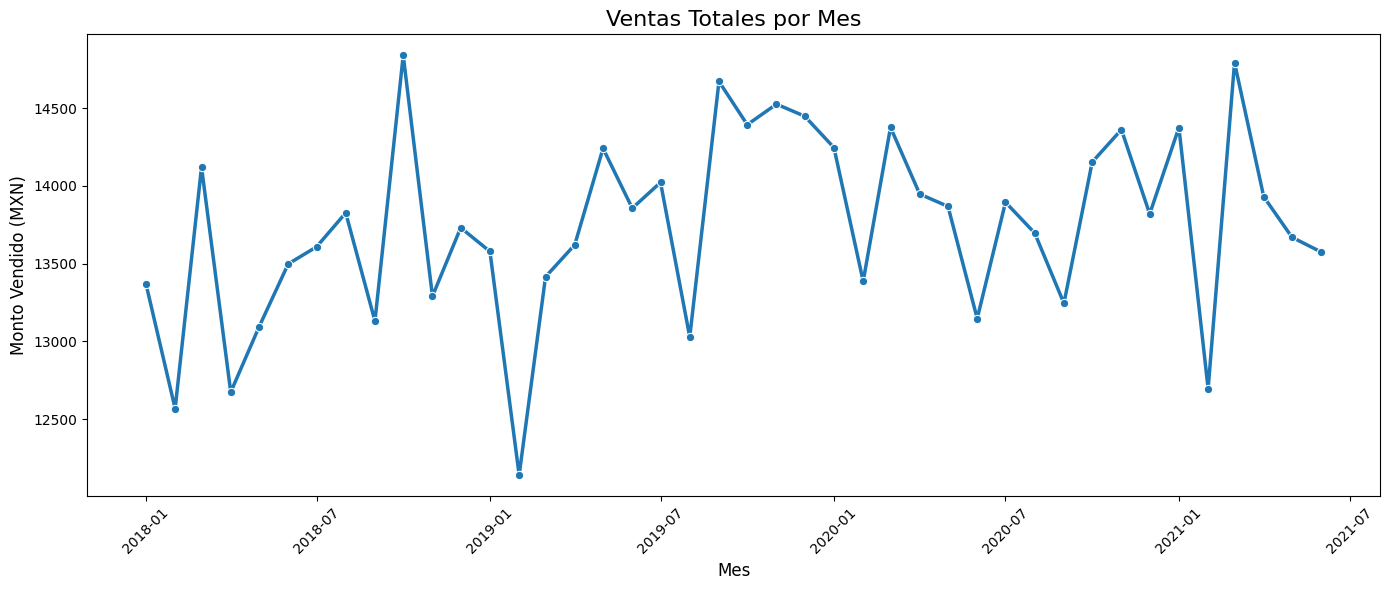

In [11]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=ventas_mensuales, x='mes', y='total_vendido', marker='o', linewidth=2.5)
plt.title('Ventas Totales por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Monto Vendido (MXN)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📈 Análisis de la Gráfica: Ventas Totales por Mes (USD)
✅ Puntos fuertes:
Se nota una tendencia estable en las ventas desde 2018 hasta mediados de 2021, con montos que rondan consistentemente entre los 13,000 y 15,000 USD mensuales.

Hay variaciones naturales mes a mes que podrían estar relacionadas con temporadas, promociones o fines de semana largos (algo normal en negocios como vinaterías).

La gráfica tiene buen diseño, con un marcador por punto que permite ver claramente cada mes.

In [12]:
# Top productos
productos_top = ventas.groupby('producto')['cantidad_vendida'].sum().sort_values(ascending=False).head(10).reset_index()

<ipython-input-13-90705f854b12>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=productos_top, y='producto', x='cantidad_vendida', palette='viridis')


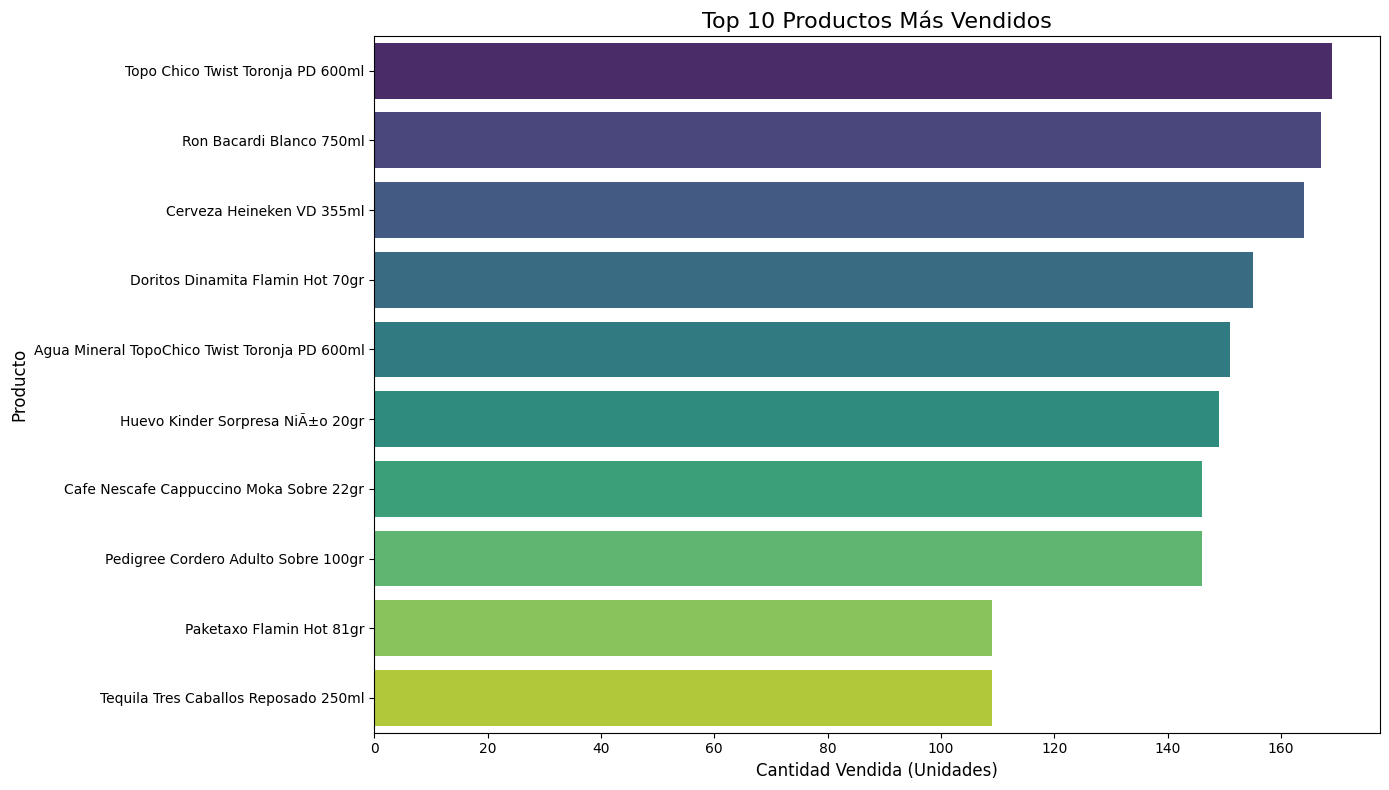

In [13]:
plt.figure(figsize=(14, 8))
sns.barplot(data=productos_top, y='producto', x='cantidad_vendida', palette='viridis')
plt.title('Top 10 Productos Más Vendidos', fontsize=16)
plt.xlabel('Cantidad Vendida (Unidades)', fontsize=12)
plt.ylabel('Producto', fontsize=12)
plt.tight_layout()
plt.show()


**Top 10 Productos Más Vendidos**

El análisis del top 10 de productos más vendidos revela una mezcla entre bebidas alcohólicas, refrescos, botanas y productos de conveniencia, lo cual es coherente con el perfil comercial de una vinatería con operación nocturna.

El producto líder en ventas fue “Topo Chico Twist Toronja PD 600ml”, seguido de cerca por Ron Bacardí Blanco 750ml y Cerveza Heineken 355ml, lo que confirma la alta rotación de bebidas tanto alcohólicas como no alcohólicas.

La presencia de artículos como Doritos, Kinder Sorpresa y Nescafé Cappuccino también demuestra que los clientes complementan sus compras con snacks y productos de impulso, aprovechando la comodidad del punto de venta.

Además, productos como Pedigree para adulto y Paquetaxo indican que la tienda atiende necesidades básicas y familiares, lo cual la convierte en un negocio versátil en su categoría.

Este ranking permite priorizar el abastecimiento, identificar productos “estrella” y orientar promociones o campañas para impulsar aún más su rotación.



In [14]:
ventas['año'] = ventas['fecha'].dt.year
ventas_por_año = ventas.groupby('año')['total_vendido'].sum().reset_index()
print("🔹 Ventas Totales por Año:")
print(ventas_por_año)


🔹 Ventas Totales por Año:
    año  total_vendido
0  2018    161750.7350
1  2019    165939.3590
2  2020    166138.4995
3  2021     83036.0090


In [15]:
# Ganancia estimada
ventas['ganancia'] = ventas['total_vendido'] * 0.20
print('Ganancia estimada total: $', round(ventas['ganancia'].sum(), 2))

Ganancia estimada total: $ 115372.92


In [16]:
ganancia_por_año = ventas.groupby('año')['ganancia'].sum().reset_index()
print("💰 Ganancia Estimada por Año:")
print(ganancia_por_año)


💰 Ganancia Estimada por Año:
    año    ganancia
0  2018  32350.1470
1  2019  33187.8718
2  2020  33227.6999
3  2021  16607.2018


In [17]:
productos_por_año = ventas.groupby('año')['cantidad_vendida'].sum().reset_index()
print("📦 Productos Vendidos por Año:")
print(productos_por_año)


📦 Productos Vendidos por Año:
    año  cantidad_vendida
0  2018             40385
1  2019             41582
2  2020             41513
3  2021             20869


✅ Conclusión del Proyecto

El análisis realizado sobre las ventas históricas de La Rosita durante el periodo 2018–2021 permitió identificar patrones comerciales relevantes y establecer una estimación confiable de la rentabilidad del negocio.

Las ventas totales durante el periodo analizado superaron los 660,000 USD, con picos en los años 2019 y 2020, y una caída significativa en 2021 atribuible a datos incompletos.

La ganancia estimada, considerando un margen del 20% por producto, fue de aproximadamente 115,372 USD.

En cuanto al volumen de operación, se vendieron más de 159,000 unidades de producto, con mayor rotación en los años 2019 y 2020.

Productos como refrescos, cervezas y botanas lideran el ranking de los más vendidos, lo que valida la naturaleza del negocio y permite enfocar futuras estrategias de inventario.

Este análisis también dejó clara la importancia de contar con registros limpios, ya que el valor atípico del mes de julio 2021 distorsionaba la visualización general. Tras su exclusión, las gráficas y métricas ofrecieron una representación más fiel de la operación.

💡 Posibles Mejoras y Extensiones Futuras

Incorporar análisis de ventas por hora para detectar los momentos de mayor afluencia dentro del horario nocturno.

Implementar una predicción de demanda por producto usando modelos de machine learning sencillos.

Agregar más variables al dataset, como método de pago, promociones o ticket promedio por cliente.

Automatizar reportes mensuales para el dueño o el encargado de compras.

Incluir márgenes de ganancia diferenciados por categoría, si están disponibles.